### 1. Analyze the Data

#### Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#### Data Preprocessing

In [25]:
df = pd.read_csv('Downloads/MSFT.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [26]:
df.shape

(1259, 7)

In [27]:
len(df)

1259

In [28]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-19,67.500000,68.099998,67.430000,67.690002,63.549782,26961100
1,2017-05-22,67.889999,68.500000,67.500000,68.449997,64.263275,16237600
2,2017-05-23,68.720001,68.750000,68.379997,68.680000,64.479210,15425800
3,2017-05-24,68.870003,68.879997,68.449997,68.769997,64.563705,14593900
4,2017-05-25,68.970001,69.879997,68.910004,69.620003,65.361717,21854100
...,...,...,...,...,...,...,...
1254,2022-05-12,257.690002,259.880005,250.020004,255.350006,255.350006,51033800
1255,2022-05-13,257.350006,263.040009,255.350006,261.119995,261.119995,34893400
1256,2022-05-16,259.959991,265.820007,255.779999,261.500000,261.500000,32550900
1257,2022-05-17,266.109985,268.329987,262.459991,266.820007,266.820007,28806100


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe contains stock prices between 2017-05-19 00:00:00 2022-05-18 00:00:00
Total days = 1825 days


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,171.869913,173.563701,170.030064,171.880064,168.859214,2.947084e+07
std,79.573595,80.379943,78.653997,79.546935,80.789037,1.307347e+07
min,67.500000,68.099998,67.430000,67.690002,63.549782,7.425600e+06
25%,104.115002,105.449997,102.625000,104.230000,100.195797,2.124435e+07
50%,144.970001,147.500000,143.759995,145.960007,142.449112,2.613270e+07
75%,234.485001,236.849998,231.620002,234.189995,232.297837,3.365610e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.112421e+08


<AxesSubplot:>

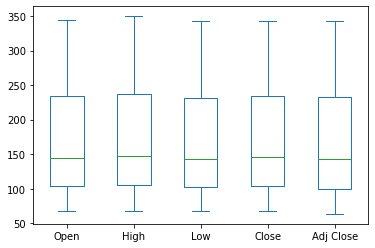

In [10]:
df[['Open','High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

#### Setting the layout for our plot

In [11]:
layout = go.Layout(
    title = 'Stock Prices of Microsoft',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monoscope',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monoscope',
            size = 18,
            color = '#7f7f7f'
        )
    )
)

In [12]:
df_data = [{'x':df['Date'], 'y':df['Adj Close']}]
plot = go.Figure(data = df_data, layout=layout)

In [13]:
iplot(plot)

#### Split dataset

In [14]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
x = np.array(df.index).reshape(-1,1)
y = df['Adj Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
x_train.shape

(881, 1)

In [16]:
x_test.shape

(378, 1)

### 2.Train the Model

In [17]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#For importing Linear Regresion algorithm
from sklearn.linear_model import LinearRegression

In [18]:
#Feature scaling
scaler = StandardScaler().fit(x_train)

In [19]:
#Creating linear regression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### 3. Test the model

In [20]:
y_pred = lm.predict(x_test)

In [21]:
len(y_pred)

378

#### Visualization

In [22]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = x_test.T[0],
    y = y_test,
    mode = 'markers',
    name = 'Actual')
trace1 = go.Scatter(
    x = x_test.T[0],
    y = y_pred,
    mode = 'lines',
    name = 'Predicted')
df_test_data = [trace0, trace1]
#layout.xaxis.title.text = 'Date'
plot2 = go.Figure(data = df_test_data, layout=layout)

In [23]:
iplot(plot2)

### 4. Prediction Accuracy

In [53]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''

In [54]:
print(scores)


Metric           Train                Test        
r2_score  0.9345509693000631	0.932381482654013
MSE       429.2401308816603	431.82584438719584

